In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
from fastai import *
from fastai.vision import *

## Scenario 1: Labels are folder names

In [3]:
path = untar_data(URLs.MNIST_SAMPLE)
path

PosixPath('/home/nikita/.fastai/data/mnist_sample')

In [4]:
path.ls()

[PosixPath('/home/nikita/.fastai/data/mnist_sample/train'),
 PosixPath('/home/nikita/.fastai/data/mnist_sample/labels.csv'),
 PosixPath('/home/nikita/.fastai/data/mnist_sample/valid')]

You see there are a training set and the validation set already. So basically the people that put together this dataset have already decided what they want you to use as a validation set.



In [5]:
(path/'train').ls()

[PosixPath('/home/nikita/.fastai/data/mnist_sample/train/3'),
 PosixPath('/home/nikita/.fastai/data/mnist_sample/train/7')]

There are a folder called 3 and a folder called 7. Now this is really common way to give people labels. Basically it says everything that's a three, I put in a folder called three. Everything that's a seven, I'll put in a folder called seven. This is often called an "ImageNet style dataset" because this is how ImageNet is distributed. So if you have something in this format where the labels are just whatever the folders are called, you can say from_folder.

In [9]:
tfms = get_transforms(do_flip=False)
data = ImageDataBunch.from_folder(path,ds_tfms=tfms,size=26)

This will create an ImageDataBunch for you and as you can see it created the labels:

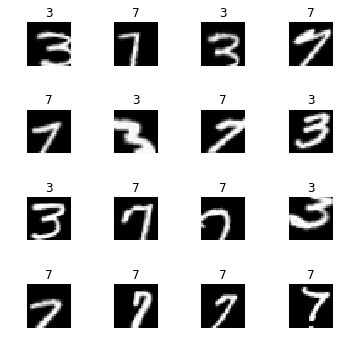

In [10]:
data.show_batch(rows=4,figsize=(5,5))

## Scenario 2: CSV file 

Another possibility, and for this MNIST sample, I've got both, it might come with a CSV file that would look something like this.

In [11]:
df = pd.read_csv(path/'labels.csv') 
df.head()

,name,label
0,train/3/7463.png,0
1,train/3/21102.png,0
2,train/3/31559.png,0
3,train/3/46882.png,0
4,train/3/26209.png,0


In [12]:
data = ImageDataBunch.from_csv(path,ds_tfms=tfms, size=28)

NOTE: And if it is called labels.csv, you don't even have to pass in a file name. If it's called something else, then you can pass in the csv_labels

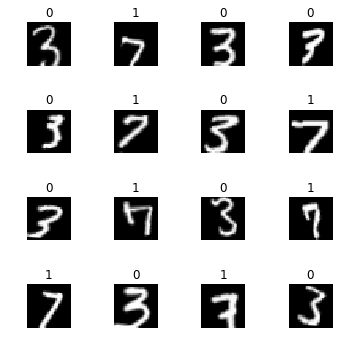

In [13]:
data.show_batch(rows=4,figsize=(5,5))

In [14]:
data.classes

[0, 1]

## Scenario 3: Using regular expression

In [15]:
fn_paths = [path/name for name in df['name']]
fn_paths[:2]

[PosixPath('/home/nikita/.fastai/data/mnist_sample/train/3/7463.png'),
 PosixPath('/home/nikita/.fastai/data/mnist_sample/train/3/21102.png')]

This is the same thing, these are the folders. But I could actually grab the label by using a regular expression. We've already seen this approach:

In [16]:
pat = r"(\d)/\d+\.png$"

In [17]:
data = ImageDataBunch.from_name_re(path, fn_paths,pat=pat, ds_tfms=tfms, size=24)

In [18]:
data.classes

['3', '7']

## Scenario 4: Something more complex

You can create an arbitrary function that extracts a label from the file name or path. In that case, you would say from_name_func:

In [19]:
data = ImageDataBunch.from_name_func(path, fn_paths, ds_tfms=tfms, size=24, label_func=lambda x:'3' if '/3/' in str(x) else '7')

In [20]:
data.classes

['3', '7']

## Scenario 5: You need something even more flexible

If you need something even more flexible than that, you're going to write some code to create an array of labels. So in that case, you can just use from_lists and pass in the array.

In [21]:
labels = [('3' if '/3/' in str(x) else '7') for x in fn_paths]

In [22]:
labels[:4]

['3', '3', '3', '3']

In [23]:
data = ImageDataBunch.from_lists(path, fn_paths,labels=labels, ds_tfms = tfms, size=24)
data.classes

['3', '7']

In [24]:
doc(ImageDataBunch.from_name_re)